In [1]:
from defectlib import extract_features_from_defect, train_svm_classifier, plot_tsne
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
features_all, labels_all, sns_all, images_all = extract_features_from_defect('./ben1214/L8009/')
# features_test, labels_test, sns_test, images_test = extract_features_from_defect('./defect_tensors_D10', comb=True)

#features_all = np.concatenate((features, features_test))
#labels_all = np.concatenate((labels, labels_test))
#sns_all = np.concatenate((sns, sns_test))
#images_all = np.concatenate((images, images_test))

there are 35 images inside L8009_7A_c0
Processing ./ben1214/L8009/7A/L8009_7A_c0/F3Y64940NUFH3RPA 7AAAAAA_2.jpg...
there are 24 images inside L8009_7A_c11
Processing ./ben1214/L8009/7A/L8009_7A_c11/F3Y64951D0EGY4TA 7AAAAAA_2.jpg...
there are 40 images inside L8009_7A_c4
Processing ./ben1214/L8009/7A/L8009_7A_c4/F3Y65020248GY4RA 7AAAAAA_2.jpg...


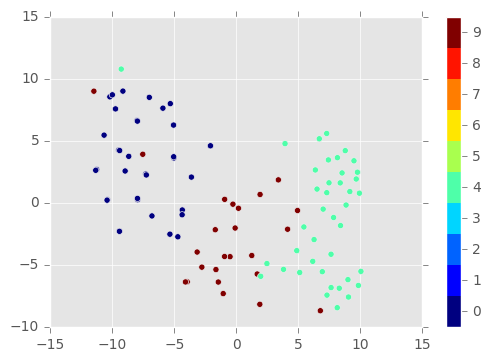

In [3]:
plot_tsne(features_all, labels_all, images_all, perplexity=15, interactive=False)

In [4]:
train_svm_classifier(features_all, labels_all, sns_all, 'model.model', split=True)

train test split == True
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.960000, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=0.800000, total=   0.0s
[CV] kernel=linear, C=1 ..............................................
[CV] ............... kernel=linear, C=1, score=1.000000, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.960000, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=0.800000, total=   0.0s
[CV] kernel=linear, C=10 .............................................
[CV] .............. kernel=linear, C=10, score=1.000000, total=   0.0s
[CV] kernel=linear, C=100 ....................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............. kernel=linear, C=100, score=0.960000, total=   0.0s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=0.800000, total=   0.0s
[CV] kernel=linear, C=100 ............................................
[CV] ............. kernel=linear, C=100, score=1.000000, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.960000, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=0.800000, total=   0.0s
[CV] kernel=linear, C=1000 ...........................................
[CV] ............ kernel=linear, C=1000, score=1.000000, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] ...... kernel=rbf, C=1, gamma=0.01, score=0.760000, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.01 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [5]:
from bokeh.plotting import figure, output_notebook
output_notebook()
from bokeh.plotting import figure, show
from tsne import bh_sne

Loading BokehJS ...

In [6]:
vis_data = bh_sne(features_all, perplexity=30)
vis_x = vis_data[:,0]
vis_y = vis_data[:,1]

vis_data_0 = vis_data[labels_all=='0']
vis_data_4 = vis_data[labels_all=='4']
vis_data_11 = vis_data[labels_all=='11']

vis_data_0_x = vis_data_0[:,0]
vis_data_0_y = vis_data_0[:,1]
vis_data_4_x = vis_data_4[:,0]
vis_data_4_y = vis_data_4[:,1]
vis_data_11_x = vis_data_11[:,0]
vis_data_11_y = vis_data_11[:,1]

In [12]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool


source1 = ColumnDataSource(
        data=dict(
            x=vis_data_0_x,
            y=vis_data_0_y,
            desc=sns_all[labels_all=='0'],
            imgs = images_all[labels_all=='0']

        )
    )


source2 = ColumnDataSource(
        data=dict(
            x=vis_data_4_x,
            y=vis_data_4_y,
            desc=sns_all[labels_all=='4'],
            imgs=images_all[labels_all=='4']
        )
    )

source3 = ColumnDataSource(
        data=dict(
            x=vis_data_11_x,
            y=vis_data_11_y,
            desc=sns_all[labels_all=='11'],
            imgs=images_all[labels_all=='11']
        )
    )


hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="50" alt="@imgs" width="50"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, alpha=0.5, color='green', source=source1)
p.circle('x', 'y', size=20, alpha=0.5, color='red', source=source2)
p.circle('x', 'y', size=20, alpha=0.5, color='blue', source=source3)

show(p)

In [15]:
for label_class in set(labels_all):
    sns_in_label = sns_all[labels_all == label_class]
    print 'the number of class {} is {}'.format(label_class, len(sns_in_label))
    print 'the number of S/Ns: is {}'.format(len(set(sns_in_label)))
    for sn in set(sns_in_label):
        print '\tthe number of S\N {}:{}'.format(sn, len(sns_all[(labels_all == label_class) & (sns_all == sn)]))

the number of class 11 is 24
the number of S/Ns: is 20
	the number of S\N F3Y650505JLGY4VC:1
	the number of S\N F3Y65050KJ1GY4VC:1
	the number of S\N F3Y65050L95GY4VC:1
	the number of S\N F3Y65050K2NGY4VC:2
	the number of S\N F3Y65050E5JGY4VC:1
	the number of S\N F3Y650512A3GY4TB:1
	the number of S\N F3Y65050HJTGY4VC:1
	the number of S\N F3Y65050KTSGY4VC:2
	the number of S\N F3Y65050L94GY4VC:2
	the number of S\N F3Y65050HJUGY4VC:1
	the number of S\N F3Y65050HJVGY4VC:1
	the number of S\N F3Y65030GEGGY4TA:2
	the number of S\N F3Y650511CQGY4TB:1
	the number of S\N F3Y650506U1GY4VC:1
	the number of S\N F3Y65050KTTGY4VC:1
	the number of S\N F3Y64951D0EGY4TA:1
	the number of S\N F3Y65010KASGY4RA:1
	the number of S\N F3Y65041DQKGY4TA:1
	the number of S\N F3Y650505PBGY4VC:1
	the number of S\N F3Y65050L92GY4VC:1
the number of class 0 is 35
the number of S/Ns: is 16
	the number of S\N F3Y64940NUFH3RPA:1
	the number of S\N F3Y649500C1H3RPA:1
	the number of S\N F3Y649501XRH3RPA:2
	the number of S\